In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from IPython.display import clear_output

In [4]:
import aics_da

# For non-Gaussian

In [5]:
N = 2
nG = []
ks = [2**nk for nk in range(5, 17)]
ls = [2**nl for nl in range(5, 13)]
for K in ks:
    xs = np.random.normal(size=(N, K))
    ys = np.array([xs[0] + xs[1]**2, xs[1]])
    for L in ls:
        print("K={}, L={}".format(K, L))
        ngs = [aics_da.non_gaussianity(ys, L) for _ in range(10)]
        nG.append((np.average(ngs), np.std(ngs)))
        clear_output(True)

K=65536, L=4096


In [6]:
y_nGm = np.array(nG)[:, 0].reshape((len(ks), len(ls))).T
y_nGvar = np.array(nG)[:, 1].reshape((len(ks), len(ls))).T

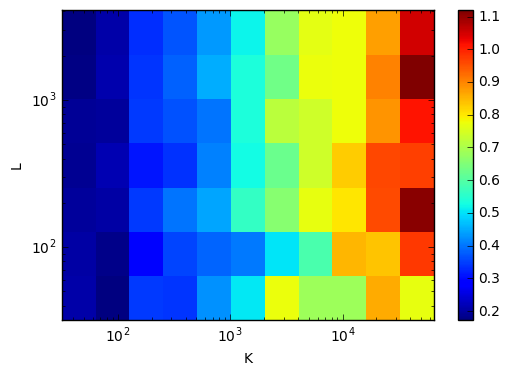

In [7]:
X, Y = np.meshgrid(ks, ls)
plt.pcolormesh(X, Y, y_nGm)
plt.xscale("log")
plt.yscale("log")
plt.axis("tight")
plt.colorbar()
plt.xlabel("K")
plt.ylabel("L")

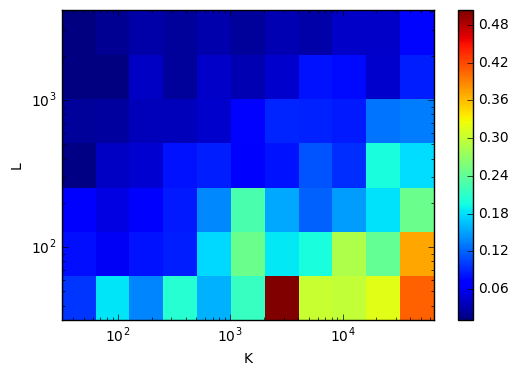

In [8]:
X, Y = np.meshgrid(ks, ls)
plt.pcolormesh(X, Y, y_nGvar)
plt.xscale("log")
plt.yscale("log")
plt.axis("tight")
plt.colorbar()
plt.xlabel("K")
plt.ylabel("L")

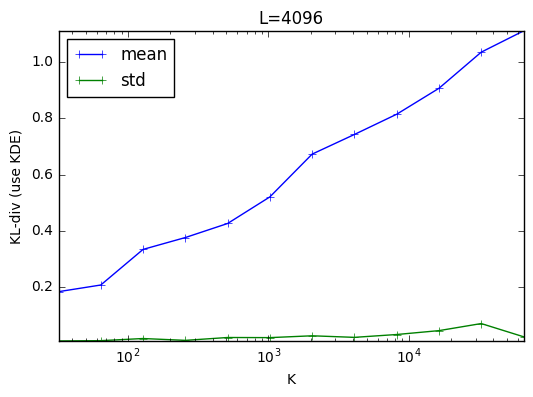

In [15]:
plt.plot(ks, y_nGm[-1], "+-", label="mean")
plt.plot(ks, y_nGvar[-1], "+-", label="std")
plt.axis("tight")
plt.title("L={}".format(ls[-1]))
plt.xscale("log")
plt.xlabel("K")
plt.ylabel("KL-div (use KDE)")
plt.legend(loc=2)

- Kに対して成長してる（定常になっていない）
- 正解の値に収束してない・・・

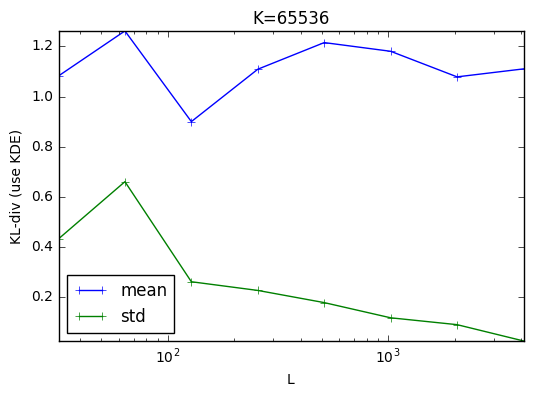

In [10]:
plt.plot(ls, y_nGm[:, -1], "+-", label="mean")
plt.plot(ls, y_nGvar[:, -1], "+-", label="std")
plt.axis("tight")
plt.title("K={}".format(ks[-1]))
plt.xscale("log")
plt.xlabel("L")
plt.ylabel("KL-div (use KDE)")
plt.legend(loc=3)

- Lについては十分定常に落ち着いてる